## Project: Help Twitter Combat Hate Speech Using NLP and Machine Learning

This project is abouut twitter data. Aim of this project is to clean up tweets and build a classification model by using NLP techniques, cleanup specific for tweets data, regularization and hyperparameter tuning using stratified k-fold and cross validation to get the best model.

The first task is to import all the necessary libraries.

In [ ]:
import pandas as pd, numpy as np

### <b> Step-1:  Load the dataframe. </b>

In [ ]:
df = pd.read_csv(r"TwitterHate.csv")

In [ ]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df.shape

(31962, 3)

### <b> Step-2:  Get the tweets into lists for easy cleanup and manipulation </b>

In [ ]:
tweet_list = df["tweet"].values

In [ ]:
tweet_list = list(tweet_list)

Let's check for the top 5 tweets.

In [ ]:
tweet_list[:5]

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation']

### <b> Step-3 & 4:  Cleaning up the data

Since tweets contains, urls unnecessary charatcters, removing them is an necessary step in any NLP project. Let's lower the data for whole dataset, it will help in increasing the accuracy of the model. 

In [ ]:
text_lower = [text.lower() for text  in tweet_list]

In [ ]:
# removing user handles @
import re

Let's remove the "@" symbol from the sentences. It will be done with the help of regular expression.

In [ ]:
tweets_at_removed = [re.sub(r"@\w+"," ",text) for text in text_lower]

In [ ]:
tweets_at_removed[:5]

['   when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "    thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation']

Now we will check whether our data contains any http or https. In yes, then we will remove them, as it will make dataset cleaner. 

In [ ]:
df.loc[df["tweet"].str.contains(re.compile(r"https?|www"))]

,id,label,tweet
609,610,1,porn vids wwwsmallgirlsexcom
1111,1112,0,#fly #and #better #with #us #buranus #www.f...
1437,1438,0,awww this is such a beautiful #song by my #...
1750,1751,0,when jake sisko saves #captainsisko on #ds9 #s...
3732,3733,0,awwwwâºï¸ â@user @user happy father's day!...
6375,6376,0,#isitthursdayyet? it's not? awwww... #critical...
8084,8085,0,couple having sex www.drunk singapore girl g...
8484,8485,0,so glad my #workout includes smoke breaks...ww...
8660,8661,0,@user just run 10kms for @user @user #lovei...
9780,9781,0,...#awwwlup awwwn them... wut z? #magicbutt0...


Looks like ourdataset contains a lot of http/https. We will remove this shortly in our program.

So, let's remove any thing that has tree www. As we can see that in id 610 there is www. But no dot is given there. Also there are many "awwwww". There is no point of keeping this so many "wwwww". Let's remove things which have three or more than three w's together. Also using TextBlob library sentiment of word "awww" does count when number of "w's" are limited. But when it is increased, word doesn't has any meaning. So, keeping this in mind word like "awww" hasn't been dropped. Only they have been kept to limited w's. 

In [ ]:
from textblob import TextBlob
TextBlob("awww").sentiment.subjectivity

0.9

In [ ]:
# subjectivity when number of w's are increased 
TextBlob("awwwww").sentiment.subjectivity

0.0

In [ ]:
# polarity when number if w's are limited
TextBlob("awww").sentiment.polarity

0.4

In [ ]:
# polarity when number of w's are increased 
TextBlob("awwwwwww").sentiment.polarity

0.0

Let's get back to our example.

In [ ]:
tweets_no_url = [re.sub(r"(www)+"," ",text) for text in tweets_at_removed]

In [ ]:
tweets_no_url[:5]

['   when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "    thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation']

There are many ways to remove the http/https. We will take the simplest approach via regular expression.

In [ ]:
tweets_no_url = [re.sub(r"(http|https)://+"," ",text) for text in tweets_no_url]

In [ ]:
tweets_no_url[:5]

['   when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "    thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation']

In [ ]:
#tweets_no_url

In [ ]:
from nltk import TweetTokenizer

In [ ]:
tt = TweetTokenizer() 

In [ ]:
tweets_tokenize = [tt.tokenize(text) for text in tweets_no_url]

In [ ]:
# tweets_tokenize

Removing stopwords. Stopwords are words in the language that doesn't have any special meanings. For example stopwords in the english language would be "i,me,myself,we,our" etc. It could be checked with the help of libraries like NLTK. First we need to download those <i> stopwords</i> from NLTK library. 

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
def stop(text):
       return [term for term in text if term not in stopwords.words("english")]         

In [ ]:
tweets_no_stopwords = [stop(text) for text in tweets_tokenize]

In [ ]:
tweets_no_stopwords[0]

['father',
 'dysfunctional',
 'selfish',
 'drags',
 'kids',
 'dysfunction',
 '.',
 '#run']

Next is checking for the presence of words like "amp" and "rt". Let's see how many of them are present in our corpus. 

In [ ]:
list_replace = ["amp","rt"]

We will combine the list of one word and punctuation into one list and then we will remove it. 

In [ ]:
import string as st
puct = st.punctuation

In [ ]:
puct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
new_list = [text for ch in tweets_no_stopwords for text in ch]

In [ ]:
one_word_list =[]
for word in new_list:
  if len(word)==1:
      one_word_list.append(word) 
one_word_list
    

In [ ]:
words_to_remove = one_word_list + list(puct)

In [ ]:
def words_removed(text):
  return [word for word in text if word not in words_to_remove]

In [ ]:
clean_tweets = [words_removed(word) for word in tweets_no_stopwords]

Now all the one words and punctuations has been removed.

### <b> Step-5:  Checkout all the top terms in tweets </b>

Now we will check for the top hash terms. Let's make a function for this purpose. 

In [ ]:
def hashtags_removed(text):
  return [re.sub("#","",word) for word in text] 

In [ ]:
clean_hash_tweets = [hashtags_removed(term) for term in clean_tweets]

In [ ]:
clean_hash_tweets[0]

['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'run']

<b> Now, gather all the hashtags into one single list </b>

In [ ]:
hash_list = [re.findall("#\w+",hash) for terms in clean_tweets for hash in terms]

In [ ]:
hash_list = [hash for text in hash_list for hash in text]

In [ ]:
hash_list[:20]

['#run',
 '#lyft',
 '#disapointed',
 '#getthanked',
 '#model',
 '#motivation',
 '#allshowandnogo',
 '#school',
 '#exams',
 '#hate',
 '#imagine',
 '#actorslife',
 '#revolutionschool',
 '#girl',
 '#allin',
 '#cavs',
 '#champions',
 '#cleveland',
 '#clevelandcavaliers',
 '#gr8']

Let's import the *Counter* from *collections* module and get the top 10 most occuring hash tags. 

In [ ]:
from collections import Counter

In [ ]:
counter = Counter(hash_list) 
count_top = counter.most_common(10) # getting top 10 frequently occuring text 
count_top   

[('#love', 1542),
 ('#positive', 874),
 ('#healthy', 571),
 ('#smile', 548),
 ('#thankful', 491),
 ('#fun', 434),
 ('#life', 406),
 ('#summer', 367),
 ('#model', 365),
 ('#affirmation', 363)]

Let's plot a graph to visualize this.

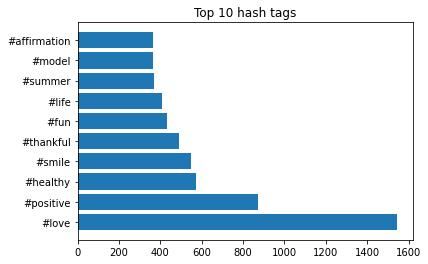

In [ ]:
# first associate word in dictionary format
dict_hash = {term:cnt for term,cnt in count_top}

# now let's plot a horizontal bar graph
import matplotlib.pyplot as plt
plt.barh(list(dict_hash.keys()),list(dict_hash.values()))
plt.title("Top 10 hash tags")
plt.show();

### <b> Step-6:  Data formatting for predictive modeling </b>

In [ ]:
# joining the tokens back to form the strings
tweet_sen = [" ".join(text) for text in clean_hash_tweets]

In [ ]:
tweet_sen[1]

"thanks lyft credit can't use cause offer wheelchair vans pdx disapointed getthanked"

<b> Next task is to separate the data into X and y.

In [ ]:
# checking whether both are equal or not
len(tweet_sen)

31962

In [ ]:
len(df["label"])

31962

So, both are same, we can proceed further for building model.

In [ ]:
from sklearn.model_selection import train_test_split
X = tweet_sen  # training set
y = df["label"].values # testing set 

In [ ]:
X[:10]

['father dysfunctional selfish drags kids dysfunction run',
 "thanks lyft credit can't use cause offer wheelchair vans pdx disapointed getthanked",
 'bihday majesty',
 'model love take time urð',
 'factsguide society motivation',
 '2/2 huge fan fare big talking leave chaos pay disputes get allshowandnogo',
 'camping tomorrow dannyâ',
 "next school year year exams can't think school exams hate imagine actorslife revolutionschool girl",
 'love land allin cavs champions cleveland clevelandcavaliers',
 "welcome i'm gr8"]

In [ ]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### <b> Step-7: TF-IDF values for the terms as a feature to get into a vector space model </b>

Since the machine learning models doesn't understand the text, we need to convert them into numerical form. Since we are going to use logistic regression for classification, we will use `TfidfVectorizer` of sklearn for this purpose. Had we using neural networks with keras, we could use `tf.keras.layers.TextVectorization`. For the present case, we will proceed with `TfidfVectorizer`.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000) # Instantiating with a maximum of 5000 terms vocabulary.

In [ ]:
train_data = tfidf.fit_transform(X_train) # Fit and apply on the train set
test_data = tfidf.transform(X_test) # apply on test data

### <b> Step 8: Model building Using Logistic Regression </b>
We will use simple logistic regression for the classification. But other classifier like Decision Tree and ensemble techinques like Random Forest and XGBoost could also be used.

Proceeding with logistic regression.

In [ ]:
from sklearn.linear_model import LogisticRegression

Let's fit it into the training data.

In [ ]:
lr =LogisticRegression()
lr.fit(train_data,y_train)  

LogisticRegression()

In [ ]:
y_train_pred = lr.predict(train_data)

In [ ]:
y_test_pred = lr.predict(test_data)

### <b> Step 9- Model evaluation: Accuracy, recall, and f_1 score </b>

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report     

In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[8879,   26],
       [ 468,  216]])

In [ ]:
# checking the accuracy score on training data
accuracy_score(y_train,y_train_pred)

0.956197201984535

Hence accuracy on train_set is approx 95.62%.

In [ ]:
# printing the classification report for training data as 
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     20815
           1       0.96      0.39      0.55      1558

    accuracy                           0.96     22373
   macro avg       0.96      0.69      0.76     22373
weighted avg       0.96      0.96      0.95     22373



The table above provides the precision, recall, f1-score and support for each classes separately. As we can see we have got the f1-score for class-1 low and approx 0.55. So, we can use `class_weight` method of LogisticRegression.

### <b> Step 10-11: Adjusting the data and train again with the adjustment and evaluate </b>

As the dataset contains more class of 0's than 1's, let's use `class_weight` method in LogisticRegression. 

In [ ]:
lr = LogisticRegression(class_weight="balanced")

In [ ]:
lr.fit(train_data,y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
y_train_pred = lr.predict(train_data)
y_test_pred = lr.predict(test_data)

In [ ]:
accuracy_score(y_train,y_train_pred)

0.9525767666383588

In [ ]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     20815
           1       0.60      0.97      0.74      1558

    accuracy                           0.95     22373
   macro avg       0.80      0.96      0.86     22373
weighted avg       0.97      0.95      0.96     22373



So after applying `class_balance` method, as witnessed above, f1 score of class-1 has improved from 0.55 to 0.74. 

### <b> Step-12: Regularization and hyperparameters </b>

Next we will use l1 and l2 regularization. These regularization helps in preventing the overfitting. We ill try to have best combination of parametres that would work with our models. So, we will use `GridSearhCV` with `StratifiedKFold` for cross validation. 

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

Next task is to provide the parameter grid to choose for ‘C’ and ‘penalty’ parameters.

In [ ]:
parameter_grid = {"penalty":["l1","l2"],"C": [0.01,0.1,1,10,100]}

In [ ]:
# creating an estimator for GridSearchCV
balanced_lr = LogisticRegression(class_weight="balanced")

Now we will define the GridSearchCV

### <b> Step-13: Assigning parameters for cross validation </b>

In [ ]:
grid_search = GridSearchCV(estimator=balanced_lr,param_grid=parameter_grid,cv=StratifiedKFold(4),verbose=1,n_jobs=-1,scoring="recall")

In [ ]:
grid_search.fit(train_data,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='recall', verbose=1)

Finding out the best estimator.

In [ ]:
grid_search.best_estimator_

LogisticRegression(C=1, class_weight='balanced')

In [ ]:
import sklearn
sklearn.__version__

'1.0.2'

  <b> Note: </b> Here above only 20 fits out of 40 fits is successful. This is because currently we are using `lbfgs` solver as by default solver of sklearn,doesn't support "l1" penalty. This solver is by default after 0.22 version of sklearn. Currently we are using 1.0.2 version, as shown above. So when we will predict the *test data*, the penalty used would be *l2.* 

### <b> Step-15: Predict and evaluate using the best estimator </b>

In [ ]:
y_test_pred = grid_search.best_estimator_.predict(test_data)

In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      8905
           1       0.49      0.77      0.60       684

    accuracy                           0.93      9589
   macro avg       0.74      0.85      0.78      9589
weighted avg       0.95      0.93      0.93      9589



In [ ]:
from sklearn.metrics import recall_score,f1_score

In [ ]:
print('Recall Score : ' + str(recall_score(y_test,y_test_pred)))

Recall Score : 0.7690058479532164


Hence the recall on the test set for the toxic comments is 0.7690058479532164

In [ ]:
print("f1 score: " + str(f1_score(y_test,y_test_pred)))

f1 score: 0.5987478656801366


Hence f1 score is 0.5987478656801366